In [5]:
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

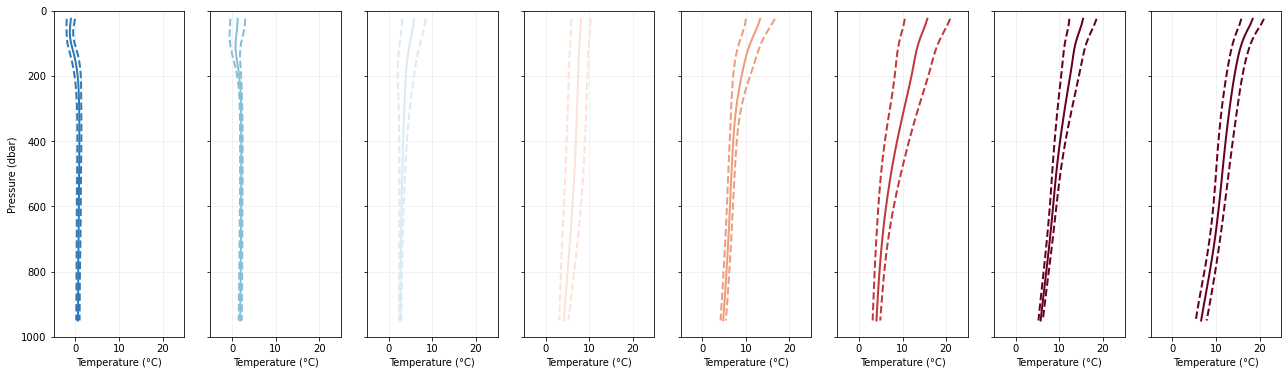

In [27]:
ls=['-','--','--']
cmap=plt.get_cmap('RdBu_r',8)
plt.figure(figsize=[22,6])
for nclass in range(1,9):   
    my_data = np.genfromtxt('Jones2019_data/Figure06_class{}.csv'.format(nclass), delimiter=',')
    npoints=int(my_data.shape[0]/3)
    ncols=int(my_data.size/3/npoints)
    curves=np.reshape(my_data,[npoints,3,ncols])
    
    ax=plt.subplot(1,8,nclass)
    for curve in range(0,3):
        x=curves[:,curve,0]
        y=curves[:,curve,1]
        cubic = interp1d(y, x,kind='cubic')
        YY=np.linspace(25,950,50)
        XX=cubic(YY)
        ax.plot(XX,YY,linestyle=ls[curve],color=cmap(nclass),lw=2)
    ax.set_ylim([1000,0])
    ax.set_xlim(-5,25)
    ax.grid(alpha=0.2)
    ax.set_xlabel('Temperature (°C)')
    if nclass==1:
        ax.set_ylabel('Pressure (dbar)')
    else:
        ax.set_yticklabels('')